In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from pandas_profiling import ProfileReport


In [2]:
infos = pd.read_csv('../data/infos.csv', sep='|', 
                    converters = {'itemID': str})
items = pd.read_csv('../data/items.csv', sep='|', 
                    converters = {'itemID': str, 'brand': str, 'manufacturer': str, 
                                  'category1': str, 'category2': str, 'category3': str})
orders = pd.read_csv('../data/orders.csv', sep='|', 
                     converters = {'time': np.datetime64, 'transactID': str, 'itemID': str})

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181955 entries, 0 to 2181954
Data columns (total 5 columns):
time          datetime64[ns]
transactID    object
itemID        object
order         int64
salesPrice    float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 83.2+ MB


In [4]:
orders.describe()

,order,salesPrice
count,2.181955e+06,2.181955e+06
mean,1.244553e+00,3.668124e+01
std,6.665127e-01,1.261080e+02
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,7.120000e+00
50%,1.000000e+00,1.668000e+01
75%,1.000000e+00,3.462000e+01
max,1.000000e+02,9.387020e+03


In [5]:
print('Order starting {} and ending {}'.format(orders['time'].min(), orders['time'].max()))

Order starting 2018-01-01 00:01:56 and ending 2018-06-29 23:57:01


In [6]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 8 columns):
itemID                    10463 non-null object
brand                     10463 non-null object
manufacturer              10463 non-null object
customerRating            10463 non-null float64
category1                 10463 non-null object
category2                 10463 non-null object
category3                 10463 non-null object
recommendedRetailPrice    10463 non-null float64
dtypes: float64(2), object(6)
memory usage: 654.1+ KB


In [7]:
items.describe()

,customerRating,recommendedRetailPrice
count,10463.000000,10463.000000
mean,1.408953,118.283142
std,2.135633,339.338973
min,0.000000,2.460000
25%,0.000000,13.950000
50%,0.000000,24.220000
75%,4.000000,67.920000
max,5.000000,6955.000000


In [8]:
infos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 3 columns):
itemID             10463 non-null object
simulationPrice    10463 non-null float64
promotion          1843 non-null object
dtypes: float64(1), object(2)
memory usage: 245.4+ KB


In [9]:
infos.describe()

,simulationPrice
count,10463.000000
mean,122.010808
std,469.701306
min,0.380000
25%,8.990000
50%,23.830000
75%,63.125000
max,9055.070000


In [10]:
infos['promotion'].unique()

array([nan, '2018-07-13', '2018-07-01,2018-07-02,2018-07-13',
       '2018-07-05,2018-07-11', '2018-07-05', '2018-07-01', '2018-07-04',
       '2018-07-08', '2018-07-08,2018-07-13', '2018-07-09', '2018-06-30',
       '2018-07-11', '2018-07-06', '2018-07-08,2018-07-11',
       '2018-06-30,2018-07-13', '2018-06-30,2018-07-01,2018-07-11',
       '2018-07-06,2018-07-13', '2018-07-06,2018-07-10', '2018-07-10',
       '2018-07-08,2018-07-10', '2018-06-30,2018-07-04',
       '2018-07-01,2018-07-10', '2018-07-02', '2018-06-30,2018-07-01',
       '2018-07-04,2018-07-05,2018-07-06', '2018-07-04,2018-07-05',
       '2018-07-01,2018-07-06', '2018-06-30,2018-07-06',
       '2018-07-05,2018-07-13', '2018-07-01,2018-07-02', '2018-07-03',
       '2018-07-03,2018-07-04,2018-07-05',
       '2018-07-03,2018-07-04,2018-07-06', '2018-07-03,2018-07-04',
       '2018-07-03,2018-07-05', '2018-07-04,2018-07-09',
       '2018-07-04,2018-07-06', '2018-07-02,2018-07-04', '2018-07-12',
       '2018-07-02,2018-07-0

the infos.csv contains only relevant information for the two week predicion period 

In [11]:
items

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10460,10461,0,253,0.00,8,44,8,128.01
10461,10462,180,253,0.00,8,44,8,166.97


In [12]:
profile = ProfileReport(items, title='Items Profiling Report', explorative=True)
profile.to_notebook_iframe()

In [13]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score
from scipy.stats import pearsonr, pointbiserialr


In [14]:
item_corr = pd.DataFrame(index=items.columns[1:], columns=items.columns[1:])
for col in item_corr.columns: 
    for row in item_corr.columns:
        if items[col].dtype == 'object': 
            if items[row].dtype == 'object': 
                item_corr.loc[row, col] = normalized_mutual_info_score(items[row], items[col])
#             else: 
#                 print(row, col)
#                 pointbiserialr(items[row].values, items[col].values)[0]
        else: 
            if items[row].dtype != 'object': 
                item_corr.loc[row, col] = pearsonr(items[row].values, items[col].values)[0]
#             else: 
#                 print(row, col)
#                 pointbiserialr(items[row].values, items[col].values)[0]
        
item_corr

,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
brand,1,0.653802,NaN,0.406557,0.493926,0.406137,NaN
manufacturer,0.653802,1,NaN,0.521556,0.643414,0.523544,NaN
customerRating,NaN,NaN,1,NaN,NaN,NaN,-0.0434403
category1,0.406557,0.521556,NaN,1,0.759947,0.955646,NaN
category2,0.493926,0.643414,NaN,0.759947,1,0.746469,NaN
category3,0.406137,0.523544,NaN,0.955646,0.746469,1,NaN
recommendedRetailPrice,NaN,NaN,-0.0434403,NaN,NaN,NaN,1


High Correlation between category1 and category3 

In [15]:
orders['totalSalesPrice'] = orders['order']*orders['salesPrice']

In [16]:
print('Most common items in transactions')
orders['itemID'].value_counts().sort_values(ascending=False)[:10]

Most common items in transactions


5035    8973
5117    8063
7789    7415
5122    6442
5139    5407
4208    5088
8371    4999
4322    4955
7792    4631
5039    4433
Name: itemID, dtype: int64

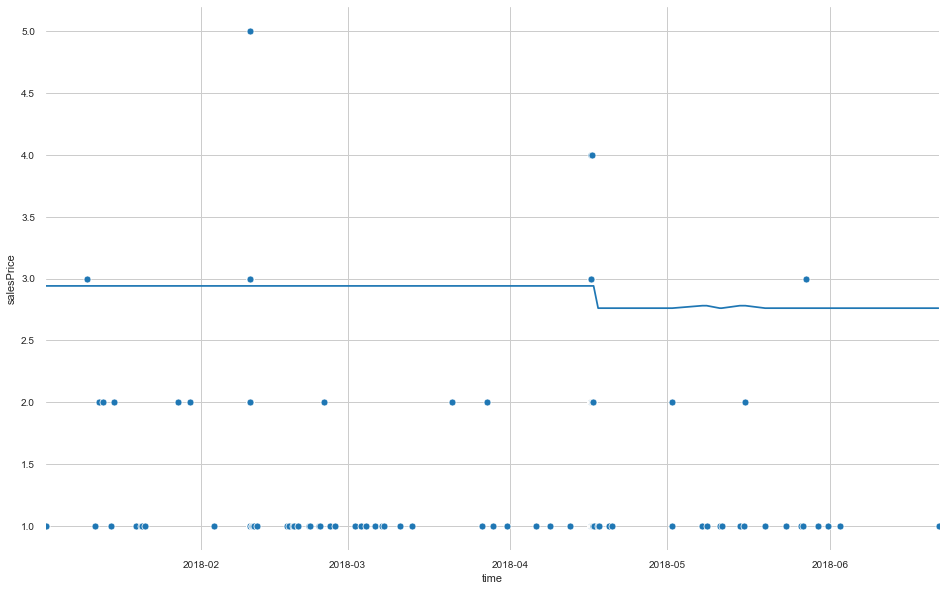

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'time', y='order', data=orders[orders['itemID']=='8063'])
sns.lineplot(x = 'time', y='salesPrice', data=orders[orders['itemID']=='8063'])
plt.xlim(left=orders[orders['itemID']=='8063']['time'].min(), right=orders[orders['itemID']=='8063']['time'].max())
plt.grid()

In [18]:
orders[orders['itemID']=='8063']

,time,transactID,itemID,order,salesPrice,totalSalesPrice
5585,2018-01-02 10:05:07,2271188,8063,1,2.94,2.94
5677,2018-01-02 10:20:34,2270802,8063,1,2.94,2.94
54147,2018-01-10 06:20:17,2289088,8063,3,2.94,8.82
61183,2018-01-11 18:49:42,2279065,8063,1,2.94,2.94
63521,2018-01-12 14:50:55,2286767,8063,2,2.94,5.88
...,...,...,...,...,...,...
1647784,2018-05-27 11:55:14,2291494,8063,3,2.76,8.28
1679355,2018-05-29 16:42:48,2255962,8063,1,2.76,2.76
1712338,2018-05-31 17:39:46,2282044,8063,1,2.76,2.76
1743034,2018-06-02 22:36:33,1635077,8063,1,2.76,2.76


In [126]:
df_ = orders.copy()

In [127]:
df_['date'] = df_['time'].dt.date

In [128]:
sales_values = df_.groupby('date').apply(lambda x: x['totalSalesPrice'].sum())

In [129]:
sales = pd.DataFrame({'time': pd.to_datetime(sales_values.index.values), 'sales': sales_values.values})

In [131]:
sales['weekDay'] = sales['time'].dt.weekday

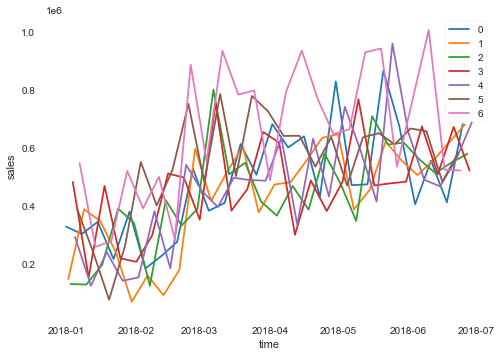

In [132]:
for weekDay in sales['weekDay'].unique():
    sns.lineplot(x='time', y='sales', data=sales[sales['weekDay'] == weekDay], label=weekDay)
# sns.scatterplot(x='time', y='salesPerDay', data=sales, label='total', )

In [134]:
sales['week'] = sales['time'].dt.week

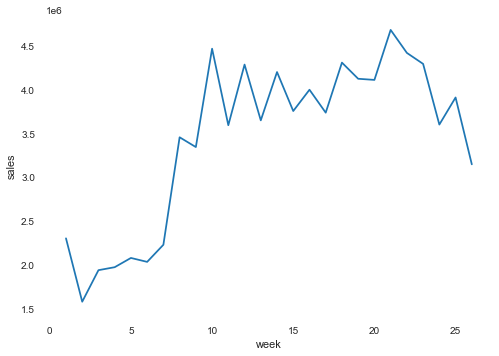

In [137]:
sns.lineplot(x=sales.groupby('week').sum().index, y=sales.groupby('week').sum()['sales'])


## Orders per Day

In [20]:
orders_per_day = orders.copy()

In [22]:
orders_per_day['time'] = orders_per_day['time'].dt.date

In [24]:
orders_per_day.drop(['salesPrice', 'transactID'], axis=1, inplace=True)

In [28]:
orders_per_day.groupby(['time', 'itemID']).sum()

order  totalSalesPrice
time       itemID                        
2018-01-01 109         2            11.60
           11          1             2.13
           113        81           277.02
           128         1            42.38
           137         1            42.26
...                  ...              ...
2018-06-29 9889       36           744.84
           9907        1            80.00
           9908        1           631.81
           9922        1            13.37
           9997       10           309.70

[100148 rows x 2 columns]

In [29]:
orders_per_day = orders_per_day.groupby(['time', 'itemID']).sum().reset_index()

In [31]:
orders_per_day['salesPrice'] = orders_per_day['totalSalesPrice'] / orders_per_day['order']

In [32]:
orders_per_day

,time,itemID,order,totalSalesPrice,salesPrice
0,2018-01-01,109,2,11.60,5.80
1,2018-01-01,11,1,2.13,2.13
2,2018-01-01,113,81,277.02,3.42
3,2018-01-01,128,1,42.38,42.38
4,2018-01-01,137,1,42.26,42.26
...,...,...,...,...,...
100143,2018-06-29,9889,36,744.84,20.69
100144,2018-06-29,9907,1,80.00,80.00
100145,2018-06-29,9908,1,631.81,631.81
100146,2018-06-29,9922,1,13.37,13.37


In [38]:
orders_per_day.groupby('itemID').count()['time'].sort_values(ascending=False)[:10]

itemID
7798    180
5122    151
7789    137
5035    122
7792    121
8085    108
4208    104
7938    102
4896    101
5117     99
Name: time, dtype: int64

C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(736695.0, 736874.0)

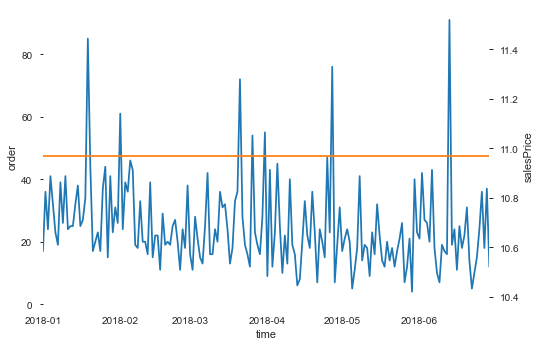

In [67]:
item = '7798'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_day[orders_per_day['itemID']==item]['time'].min(), right=orders_per_day[orders_per_day['itemID']==item]['time'].max())


C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(736700.0, 736874.0)

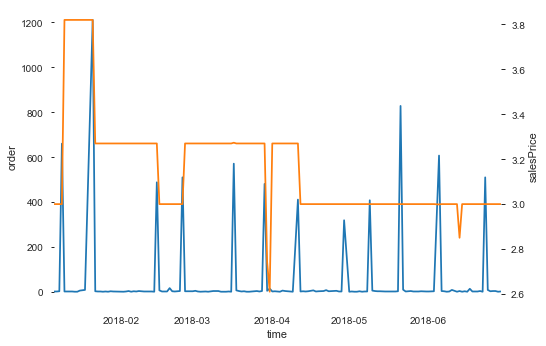

In [68]:
item = '5122'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_day[orders_per_day['itemID']==item]['time'].min(), right=orders_per_day[orders_per_day['itemID']==item]['time'].max())


C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(736696.0, 736874.0)

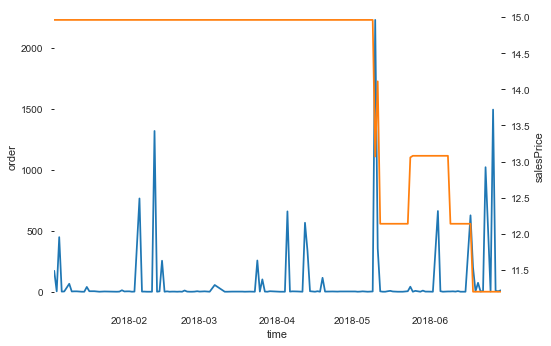

In [69]:
item = '7789'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_day.loc[orders_per_day['itemID']==item]['time'], y=orders_per_day.loc[orders_per_day['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_day[orders_per_day['itemID']==item]['time'].min(), right=orders_per_day[orders_per_day['itemID']==item]['time'].max())


In [95]:
orders_per_week = orders_per_day.copy()

In [96]:
orders_per_week

,time,itemID,order,totalSalesPrice,salesPrice
0,2018-01-01,109,2,11.60,5.80
1,2018-01-01,11,1,2.13,2.13
2,2018-01-01,113,81,277.02,3.42
3,2018-01-01,128,1,42.38,42.38
4,2018-01-01,137,1,42.26,42.26
...,...,...,...,...,...
100143,2018-06-29,9889,36,744.84,20.69
100144,2018-06-29,9907,1,80.00,80.00
100145,2018-06-29,9908,1,631.81,631.81
100146,2018-06-29,9922,1,13.37,13.37


In [97]:
orders_per_week['week'] = orders_per_week['time'].astype(np.datetime64).dt.week

In [98]:
orders_per_week = orders_per_week.drop(['salesPrice', 'time'], axis=1).groupby(['week', 'itemID']).sum().reset_index(drop=False)

In [99]:
orders_per_week

,week,itemID,order,totalSalesPrice
0,1,105,1,85.46
1,1,109,2,11.60
2,1,11,1,2.13
3,1,113,225,769.79
4,1,114,3,140.70
...,...,...,...,...
55132,26,9984,1,157.09
55133,26,999,1,52.61
55134,26,9990,1,59.81
55135,26,9997,10,309.70


In [101]:
orders_per_week['salesPrice'] = orders_per_week['totalSalesPrice'] / orders_per_week['order']

C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(1.0, 26.0)

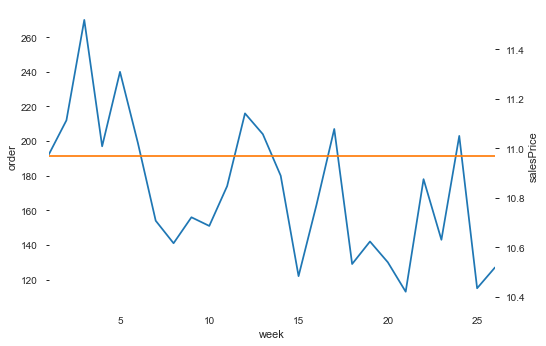

In [102]:
item = '7798'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_week[orders_per_week['itemID']==item]['week'].min(), right=orders_per_week[orders_per_week['itemID']==item]['week'].max())


C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
C:\Users\Luis\Miniconda3\envs\aiss_py37\lib\site-packages\seaborn\relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


(1.0, 26.0)

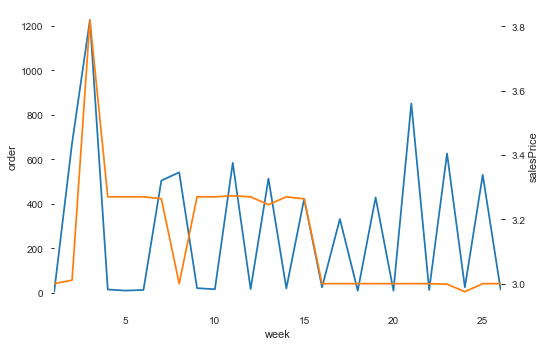

In [103]:
item = '5122'
fig, ax = plt.subplots()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['order'], ax=ax)
ax2 = ax.twinx()
sns.lineplot(x=orders_per_week.loc[orders_per_week['itemID']==item]['week'], y=orders_per_week.loc[orders_per_week['itemID']==item]['salesPrice'], c=sns.color_palette()[1], ax=ax2)
plt.xlim(left=orders_per_week[orders_per_week['itemID']==item]['week'].min(), right=orders_per_week[orders_per_week['itemID']==item]['week'].max())
